In [122]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

In [375]:
x_train = pd.read_csv('C:/Users/Muhammad Darab/OneDrive/Desktop/Online Course Files/Machine Learning/Data Sets/AnomalyDetection/AnomalyDetection-Train.csv', usecols = ['TimeStamp', 'Value'])
y_train = pd.read_csv('C:/Users/Muhammad Darab/OneDrive/Desktop/Online Course Files/Machine Learning/Data Sets/AnomalyDetection/AnomalyDetection-Train.csv', usecols = ['Is_Anomaly'])
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_cv = x_train[10000:]
y_cv = y_train[10000:]
print(x_train.shape, x_cv.shape, y_cv.shape)

(15830, 2) (5830, 2) (5830, 1)


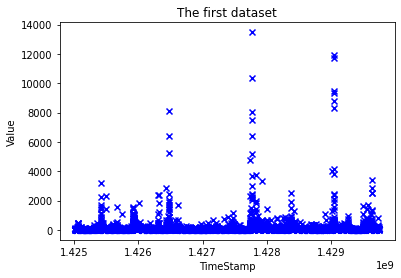

In [368]:
plt.scatter(x_train[:,0], x_train[:,1], marker='x', c='b') 
plt.title("The first dataset")
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.show()

In [369]:
def gaussian(X):
    m, n = X.shape
    mu = []
    var = []
    for i in range(n):
        su = 0
        for j in range(m):
            su += X[j][i]
        mu.append(su / m)
    for i in range(n):
        su = 0
        for j in range(m):
            su += (X[j][i] - mu[i]) ** 2
        var.append(su / m)
    mu = np.array(mu)
    var = np.array(var)
    return mu, var   

In [370]:
def probability(X, mu, var):
    p = []
    m, n = X.shape
    for i in range(m):
        product = 1
        for j in range(n):
            product = product * ((1 / (np.sqrt(2 * 3.142) * mu[j])) * (np.exp(-np.square(X[i][j] - mu[j]) / (2 * var[j]))))
        p.append(product)
    p = np.array(p)
    return p

In [380]:
def threshold(Y, p):
    step_size = (max(p) - min(p)) / 1000
    F1Scores = []
    epsilons = []
    for epsilon in np.arange(min(p), max(p), step_size):
        y_pred = []
        tp = 0
        fp = 0
        fn = 0
        for i in range(len(Y)):
            if p[i] >= epsilon:
                y_pred.append(0)
            else:
                y_pred.append(1)
        for i in range(len(y_pred)):
            if y_pred[i] == Y[i] and y_pred[i] == 1:
                tp += 1
            elif Y[i] == 0 and y_pred[i] == 1:
                fp += 1
            elif Y[i] == 1 and y_pred[i] == 0:
                fn += 1
        if tp == 0:
            F1Scores.append(0)
            epsilons.append(epsilon)
        else:
            prec = tp / (tp + fp)
            recall = tp / (tp + fn)
            F1S = (2 * prec * recall) / (prec + recall)
            F1Scores.append(F1S)
            epsilons.append(epsilon)
    return F1Scores, epsilons

In [381]:
def AnomalyDetection(x_tr, y_tr, x_c, y_c):
    mu, var = gaussian(x_tr)
    p = probability(x_c, mu, var)
    F1Scores, epsilons = threshold(y_c, p)
    F1Scores = np.array(F1Scores)
    epsilons = np.array(epsilons)
    optimal_epsilon = epsilons[np.argmax(F1Scores)]
    F1Score, accu, anomalies = accuracy(p, y_c, optimal_epsilon)
    print("The F1 Score and Accuracy of the Model respectively are", round(F1Score * 100, 2), "%", "and", round(accu * 100, 2), "%")
    print("Anomalies found are", anomalies)
    print("Actual anomalies are", sum(y_c == 1))

In [382]:
def accuracy(p, Y, optimal_epsilon):
    prec = 0
    recall = 0
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    anomalies = 0
    Y_ = []
    for i in range(len(Y)):
        if p[i] >= optimal_epsilon:
            Y_.append(0)
        else:
            Y_.append(1)
    for i in range(len(Y)):
        if Y_[i] == Y[i] and Y_[i] == 1:
            TP += 1
        elif Y_[i] != Y[i] and Y_[i] == 1:
            FP += 1
        elif Y_[i] != Y[i] and Y_[i] == 0:
            FN += 1
        elif Y_[i] == Y[i] and Y_[i] == 0:
            TN += 1
    prec = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1Score = (2 * prec * recall) / (prec + recall)
    accuracy = (TP + TN) / (TP + FN + TN + FP)
    for i in range(len(Y_)):
        if Y_[i] == 1:
            anomalies += 1
    return F1Score, accuracy, anomalies

In [383]:
AnomalyDetection(x_train, y_train, x_cv, y_cv)

The F1 Score and Accuracy of the Model respectively are 39.06 % and 95.56 %
Anomalies found are 110
Actual anomalies are [315]


(15000,) 7.82658021964725e-17
